In [6]:
import json
import os
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import data_utils.coco_utils as utils
import data_utils.coco_visualize as visualize
from data_utils.utils import paths as pth



In [7]:
paths = {}

paths["DATASET_IMAGES_PATH_TRAIN"] = pth["train_img"]
paths["DATASET_IMAGES_PATH_VAL"] = pth["val_img"]
paths["DATASET_IMAGES_PATH_TEST"] = pth["test_img"]

paths["DATASET_ANNOTATIONS_PATH_TRAIN"] = pth["train_ann"]
paths["DATASET_ANNOTATIONS_PATH_VAL"] = pth["val_ann"]
paths["DATASET_ANNOTATIONS_PATH_TEST"] = pth["test_ann"]

output_path = "data/output/statistics"

In [8]:
annotations = {}
annotations["val"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_VAL"])
annotations["test"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_TEST"])
annotations["train"] = utils.load_annotations(paths["DATASET_ANNOTATIONS_PATH_TRAIN"])

keypoint_names = annotations["val"]["categories"][0]["keypoints"]
keypoint_connections = annotations["val"]["categories"][0]["skeleton"]


annotations["val_medium"] = utils.load_annotations("E:/Datasets/COCO_medium/annotations/val_annotation.json")
annotations["train_medium"] = utils.load_annotations("E:/Datasets/COCO_medium/annotations/train_annotation.json")

In [9]:
def plot_bar(data, labels, keypoints, width = 0.3, style="seaborn-colorblind", path=""):
    if not isinstance(data, list):
        data = [data]

    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=[6.4, 4.8])

        axlabels = [str(x) for x in range(1,18)]
        x = np.arange(len(axlabels))+1

        rects = []
        for i in range(len(data)):
            rect =  ax.bar(x + (width * i) - width/2, data[i], width, label=labels[i])
            rects.append(rect)

        keypoints = [x.replace('_', ' ') for x in keypoints]
        ax.set_xticks(x)
        ax.set_xticklabels(keypoints, rotation=90)
        plt.sca(ax)
        ax.set_ylabel('visible keypoints [%]')
        ax.set_xlabel('keypoint name')
        ax.legend()
        ax.grid(axis='y')
        ax.set_axisbelow(True)
        if path:
            fig.savefig(path, bbox_inches='tight')


### Train set

In [10]:
print("|--- FULL DATASET")
keypoints0, keypounts_visible0, keypounts_not_visible0, keypounts_not_labeled0, nannotations0 = utils.get_stats(annotations["train"])
num_by_keypoints0 = np.array(list(keypounts_visible0.values())) + np.array(list(keypounts_not_visible0.values()))

print("\n\n|--- SUBSET")
keypoints1, keypounts_visible1, keypounts_not_visible1, keypounts_not_labeled1, nannotations1 = utils.get_stats(annotations["train_medium"])
num_by_keypoints1 = np.array(list(keypounts_visible1.values())) + np.array(list(keypounts_not_visible1.values()))

|--- FULL DATASET
Number of images in dataset: 118287
Number of images in dataset with annotation: 56599

Annotations: 149813
Annotations average in one image : 2.65

Visible joints: 1456841 (88.71%)
Nonvisible joints: 185442 (11.29%)

Visible joints: 1456841 (57.20%)
Nonvisible joints: 185442 (7.28%)
Nonlabeled joints: 904538 (35.52%)


|--- SUBSET
Number of images in dataset: 11883
Number of images in dataset with annotation: 5622

Annotations: 15130
Annotations average in one image : 2.69

Visible joints: 146905 (88.60%)
Nonvisible joints: 18907 (11.40%)

Visible joints: 146905 (57.11%)
Nonvisible joints: 18907 (7.35%)
Nonlabeled joints: 91398 (35.53%)


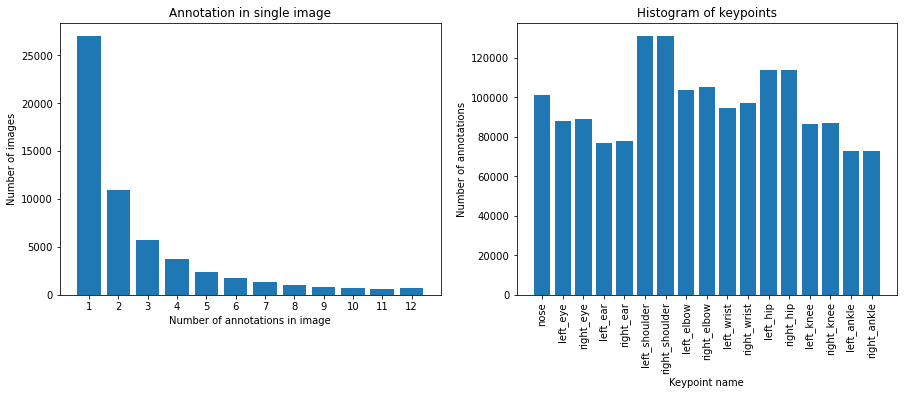

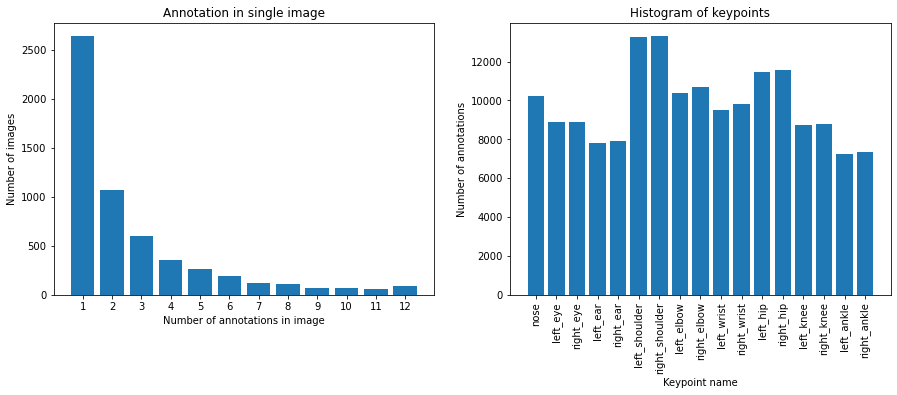

In [11]:
visualize.histograms(keypoints0, keypounts_visible0, keypounts_not_visible0, nannotations0)
visualize.histograms(keypoints1, keypounts_visible1, keypounts_not_visible1, nannotations1)

In [12]:
nannotations0_sum = np.sum(nannotations0)
nannotations1_sum = np.sum(nannotations1)
for k in keypounts_visible0:
    keypounts_visible0[k] = (keypounts_visible0[k] / nannotations0_sum) * 100
    keypounts_visible1[k] = (keypounts_visible1[k] / nannotations1_sum) * 100

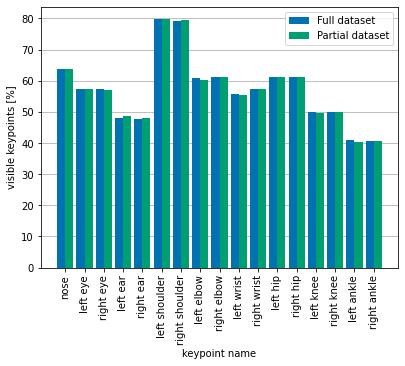

In [13]:
plot_bar([list(keypounts_visible0.values()), list(keypounts_visible1.values())], ['Full dataset', 'Partial dataset'], list(keypounts_visible0.keys()), width=0.42, path=os.path.join(output_path, "full-subset_train.pdf"))

### Validation set

In [14]:
print("|--- FULL DATASET")
keypointsV0, keypounts_visibleV0, keypounts_not_visibleV0, keypounts_not_labeledV0, nannotationsV0 = utils.get_stats(annotations["val"])
num_by_keypointsV0 = np.array(list(keypounts_visibleV0.values())) + np.array(list(keypounts_not_visibleV0.values()))

print("\n\n|--- SUBSET")
keypointsV1, keypounts_visibleV1, keypounts_not_visibleV1, keypounts_not_labeledV1, nannotationsV1 = utils.get_stats(annotations["val_medium"])
num_by_keypointsV1 = np.array(list(keypounts_visibleV1.values())) + np.array(list(keypounts_not_visibleV1.values()))

|--- FULL DATASET
Number of images in dataset: 5000
Number of images in dataset with annotation: 2346

Annotations: 6352
Annotations average in one image : 2.71

Visible joints: 59850 (87.74%)
Nonvisible joints: 8365 (12.26%)

Visible joints: 59850 (55.42%)
Nonvisible joints: 8365 (7.75%)
Nonlabeled joints: 39769 (36.83%)


|--- SUBSET
Number of images in dataset: 525
Number of images in dataset with annotation: 256

Annotations: 698
Annotations average in one image : 2.73

Visible joints: 6655 (87.51%)
Nonvisible joints: 950 (12.49%)

Visible joints: 6655 (56.08%)
Nonvisible joints: 950 (8.01%)
Nonlabeled joints: 4261 (35.91%)


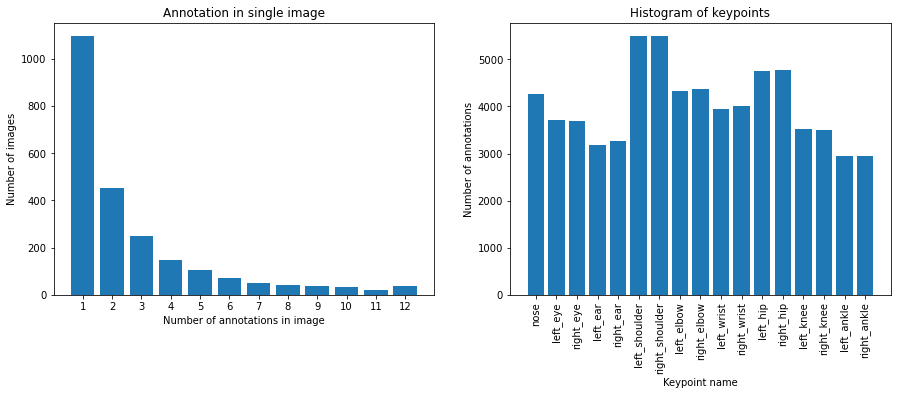

In [15]:
visualize.histograms(keypointsV0, keypounts_visibleV0, keypounts_not_visibleV0, nannotationsV0)

In [16]:
nannotationsV0_sum = np.sum(nannotationsV0)
nannotationsV1_sum = np.sum(nannotationsV1)
for k in keypounts_visibleV0:
    keypounts_visibleV0[k] = (keypounts_visibleV0[k] / nannotationsV0_sum) * 100
    keypounts_visibleV1[k] = (keypounts_visibleV1[k] / nannotationsV1_sum) * 100

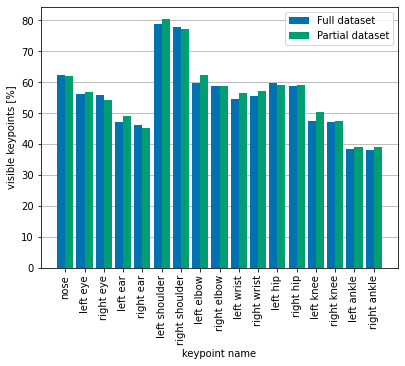

In [17]:
plot_bar([list(keypounts_visibleV0.values()), list(keypounts_visibleV1.values())], ['Full dataset', 'Partial dataset'], list(keypounts_visibleV0.keys()), width=0.42, path=os.path.join(output_path, "full-subset_val.pdf"))

### Test set

In [18]:
print("Number of images in dataset: {}".format(len(annotations["test"]["images"])))

Number of images in dataset: 15988


### Sample images

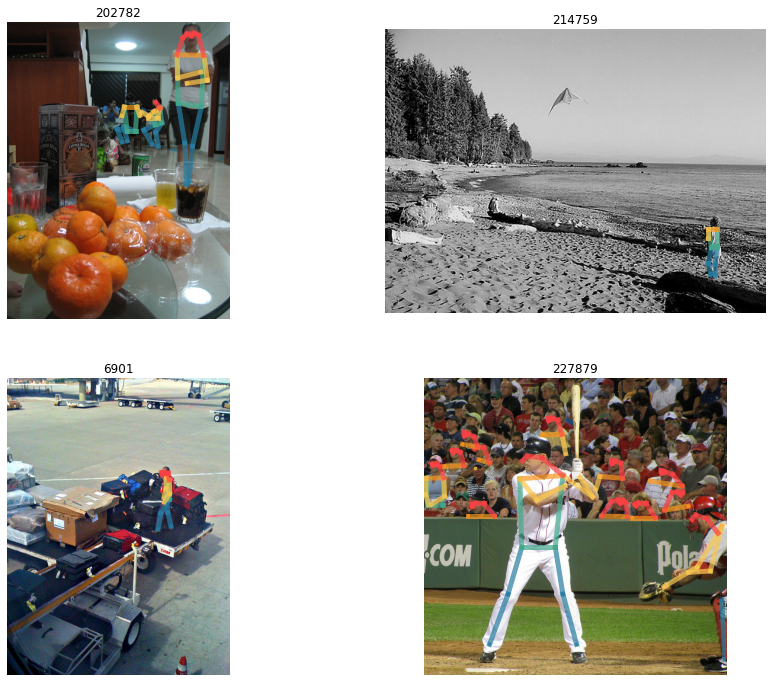

In [19]:
visualize.random_images(annotations["train"], paths["DATASET_IMAGES_PATH_TRAIN"], 4)

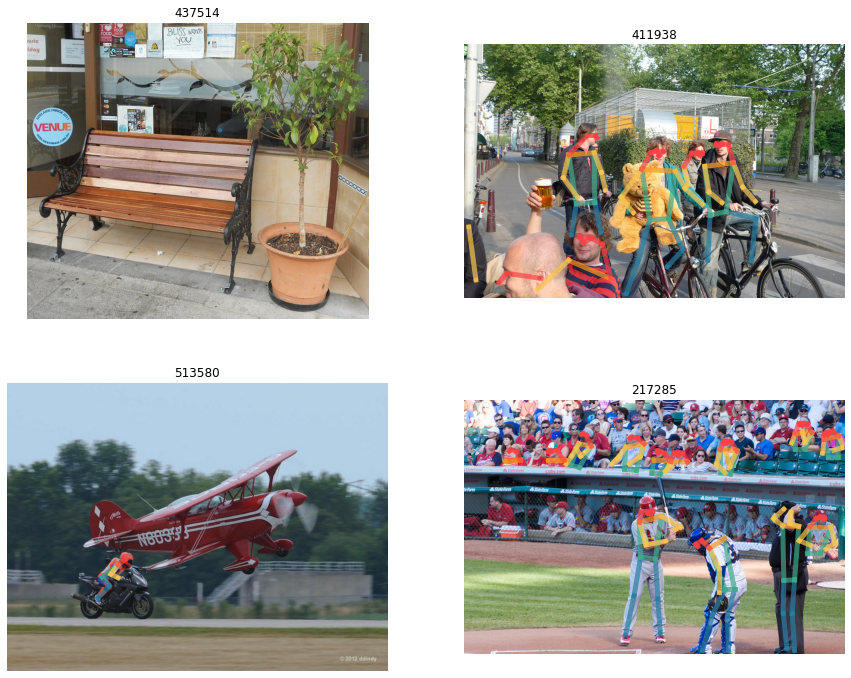

In [20]:
visualize.random_images(annotations["val"], paths["DATASET_IMAGES_PATH_VAL"], 4)

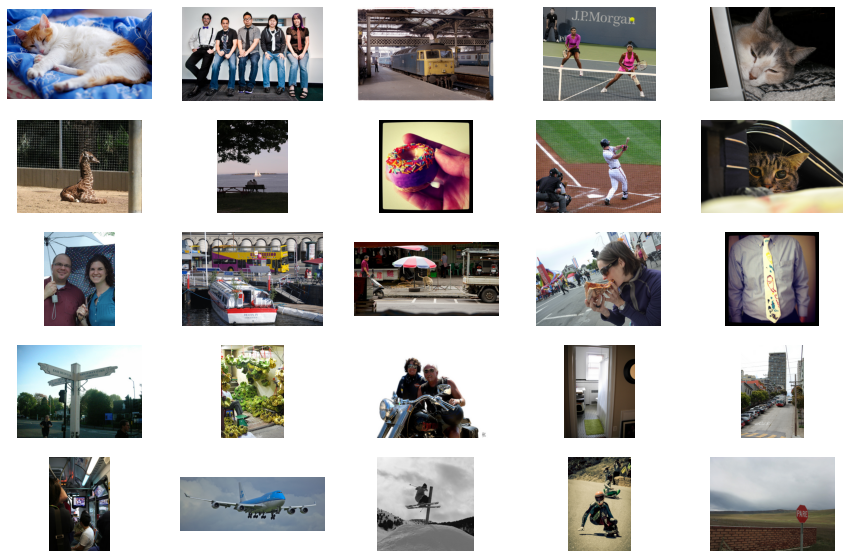

In [21]:
img = []
n = 25
idx = rnd.sample(range(0, len(annotations["test"]["images"])), n)
for i in idx:
    img.append(annotations["test"]["images"][i])

visualize.show_image(img, paths["DATASET_IMAGES_PATH_TEST"])